## Анализ датасета Homicide Reports, 1980-2014

[Link]('https://www.kaggle.com/datasets/murderaccountability/homicide-reports') - ссылка на датасет.

Данный датасет состоит из 24 колонок. Содержит описание убийств в США.

Импортируем библиотеки:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

Загружаем датасет и смотрим на составляющие

In [2]:
data = pd.read_csv(r'C:\Users\Andrew\Desktop\AI_MAI\AI_MyDat\database.csv')

c:\users\andrew\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3427: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.shape

(638454, 24)

In [4]:
data.dtypes

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age          object
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object

Смотрим на названия колонок в датасете

In [5]:
data.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

Определим количество строк всего и не нулевых строк

In [6]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

Теперь просмотрим пример данных

In [7]:
data.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


Заменим поля "Unknown" в некоторых колонках на *None* для оценки данных.

In [8]:
data['Perpetrator Age'] = data['Perpetrator Age'].replace(0, np.nan)
data['Perpetrator Race'] = data['Perpetrator Race'].replace('Unknown', np.nan)
data['Perpetrator Sex'] = data['Perpetrator Sex'].replace('Unknown', np.nan)
data['Perpetrator Ethnicity'] = data['Perpetrator Ethnicity'].replace('Unknown', np.nan)
# data['Relationship'] = data['Relationship'].replace('Unknown', np.nan)
data['Victim Age'] = data['Victim Age'].replace(0, np.nan)
data['Victim Race'] = data['Victim Race'].replace('Unknown', np.nan)
data['Victim Sex'] = data['Victim Sex'].replace('Unknown', np.nan)
data['Victim Ethnicity'] = data['Victim Ethnicity'].replace('Unknown', np.nan)
data['Weapon'] = data['Weapon'].replace('Unknown', np.nan)

data['Perpetrator Age'] = data['Perpetrator Age'].replace(0, np.nan)

data.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,NaN,Male,15,Native American/Alaska Native,NaN,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,NaN,Male,42,White,NaN,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,NaN,Male,42,White,NaN,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,0,1,FBI


Так же соберем статистику недоступных данных

In [9]:
data.isna().sum()

Record ID                     0
Agency Code                   0
Agency Name                   0
Agency Type                   0
City                          0
State                         0
Year                          0
Month                         0
Incident                      0
Crime Type                    0
Crime Solved                  0
Victim Sex                  984
Victim Age                 8444
Victim Race                6676
Victim Ethnicity         368303
Perpetrator Sex          190365
Perpetrator Age          211079
Perpetrator Race         196047
Perpetrator Ethnicity    446410
Relationship                  0
Weapon                    33192
Victim Count                  0
Perpetrator Count             0
Record Source                 0
dtype: int64

Представим ее в более наглядном виде. Можно заметить, что датасет имеет несколько столбцов, в которых большое количество данных отсутствует. более всего выделяются *Victim Ethnicity* и *Perpetrator Ethnicity*

<AxesSubplot:>

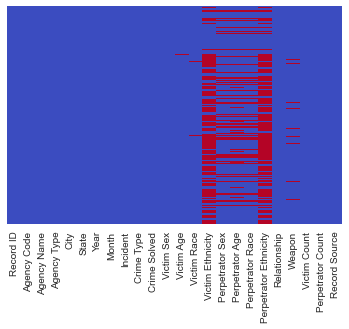

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

### Далее соберем статистику по всем данным

В данном датасете не должно быть дублирующихся данных, поэтому не будем убирать повторяющиеся столбцы.

Взглянем на количество уникальных данных в датасете.

In [11]:
unique_counts = pd.DataFrame.from_records([(col, data[col].dtype, data[col].nunique()) for col in data.columns],
                          columns=['Category', 'Data Type', 'Unique Data']).sort_values(by=['Unique Data'])
unique_counts

,Category,Data Type,Unique Data
11,Victim Sex,object,2
18,Perpetrator Ethnicity,object,2
15,Perpetrator Sex,object,2
14,Victim Ethnicity,object,2
10,Crime Solved,object,2
9,Crime Type,object,2
23,Record Source,object,2
13,Victim Race,object,4
17,Perpetrator Race,object,4
3,Agency Type,object,7


Взглянем на распределение по годам

<AxesSubplot:ylabel='Frequency'>

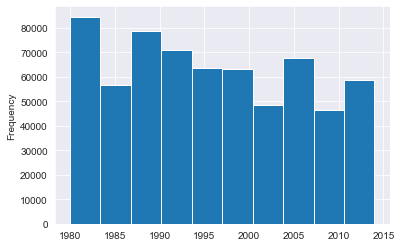

In [12]:
data['Year'].plot.hist()

Теперь распределение по полу жертвы и нападавшего

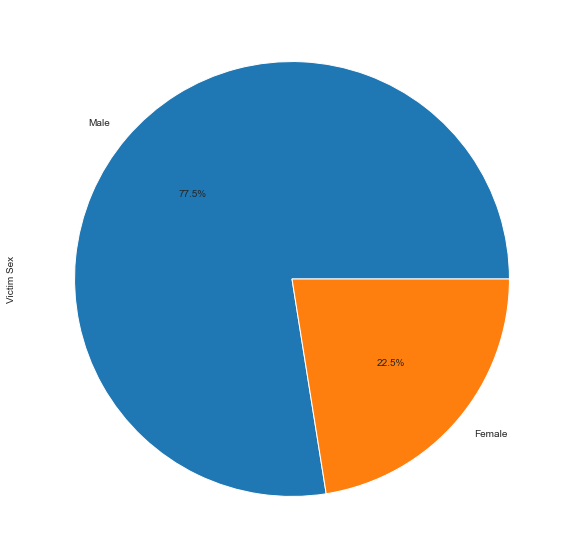

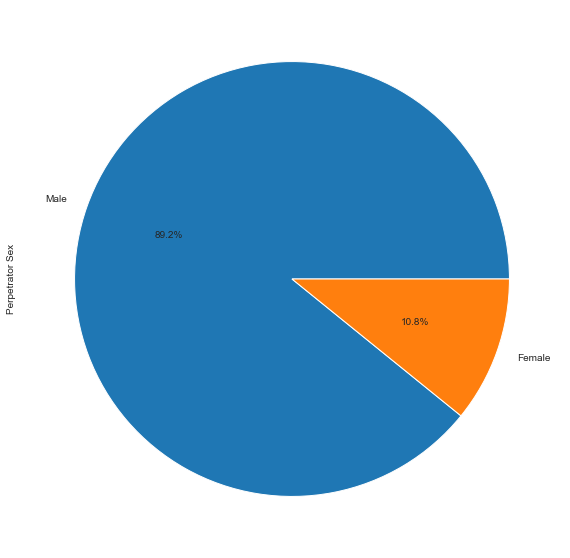

In [13]:
plt.show(data['Victim Sex'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10)))

plt.show(data['Perpetrator Sex'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10)))

Заменим все текстовые данные на числовые для дальнейшего использования

In [14]:
data_fact = data.apply(lambda col: pd.factorize(col, sort=True)[0])
data_fact.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,0,0,149,1,35,1,0,4,1,1,...,-1,1,14,2,-1,0,0,0,0,0
1,1,0,149,1,35,1,0,7,1,1,...,-1,1,41,3,-1,0,13,0,0,0
2,2,0,149,1,35,1,0,7,2,1,...,-1,-1,-1,-1,-1,26,-1,0,0,0
3,3,0,149,1,35,1,0,0,1,1,...,-1,1,41,3,-1,0,13,0,0,0
4,4,0,149,1,35,1,0,0,2,1,...,-1,-1,-1,-1,-1,26,-1,0,1,0


Взглянем на корреляцию данных в датасете

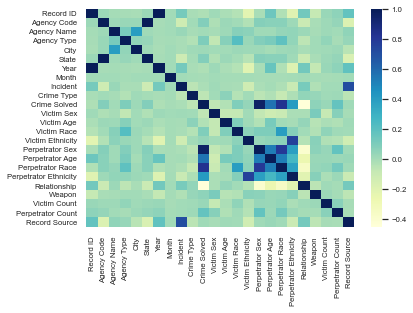

In [15]:
sns.set(font_scale=0.7)
sns.heatmap(data_fact.corr(), cmap="YlGnBu")
sns.set(font_scale=1)

Взглянем на распределение данных по каждой колонке

c:\users\andrew\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


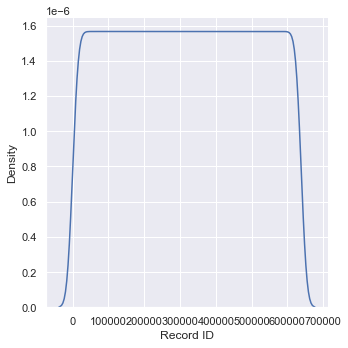

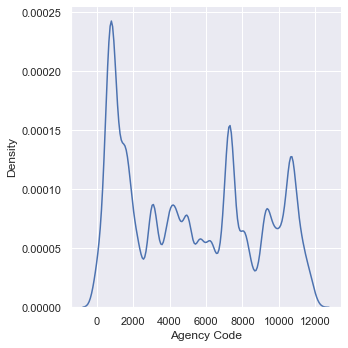

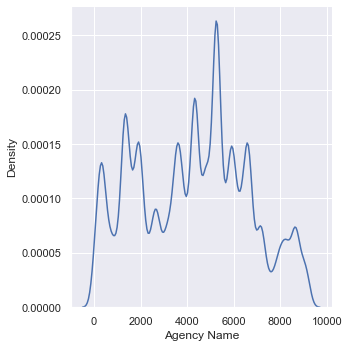

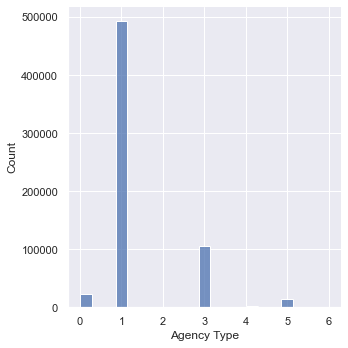

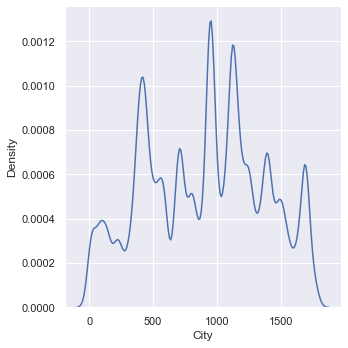

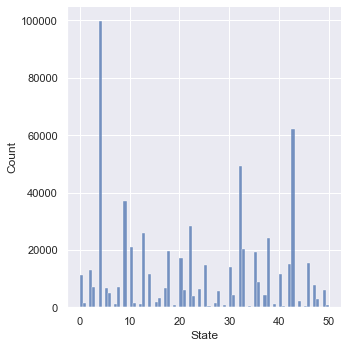

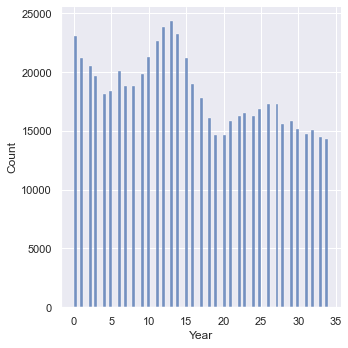

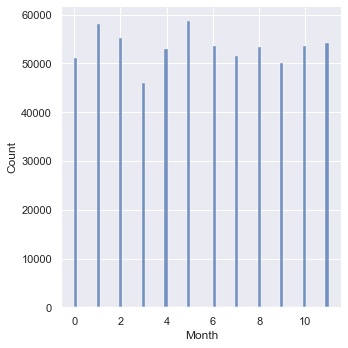

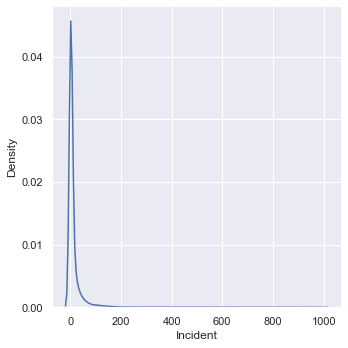

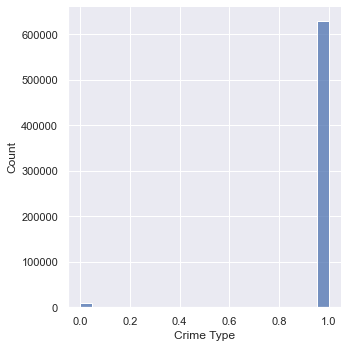

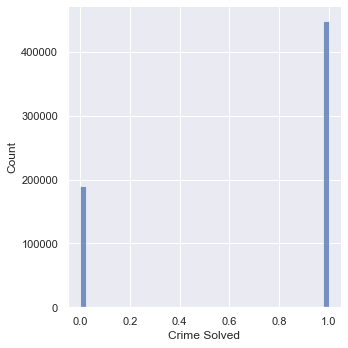

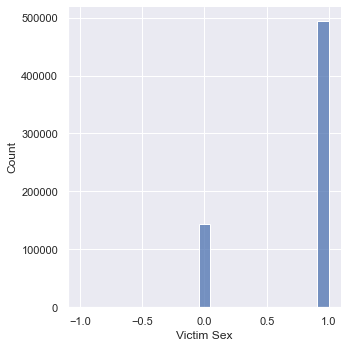

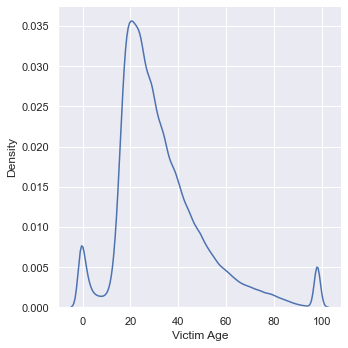

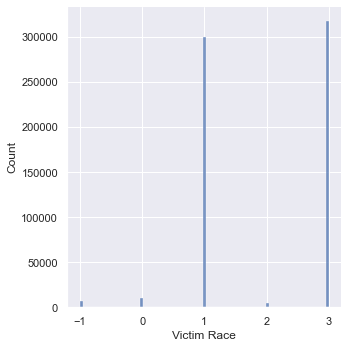

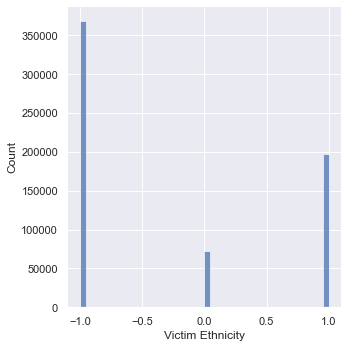

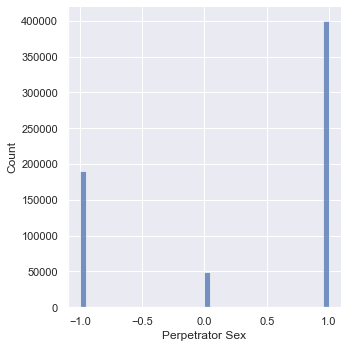

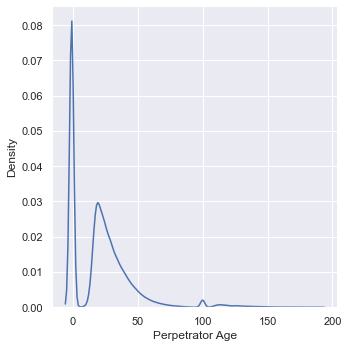

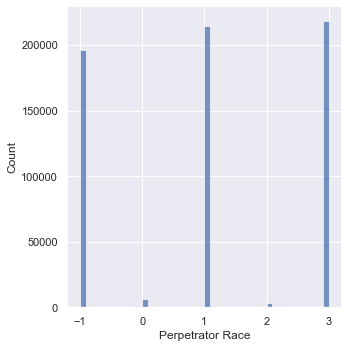

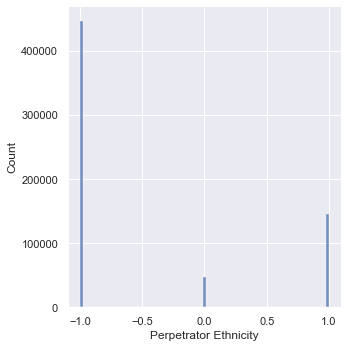

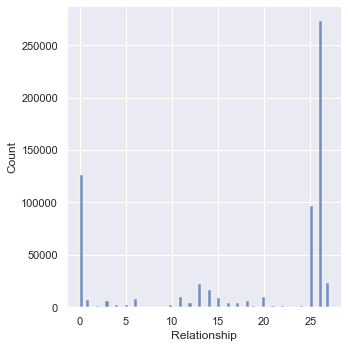

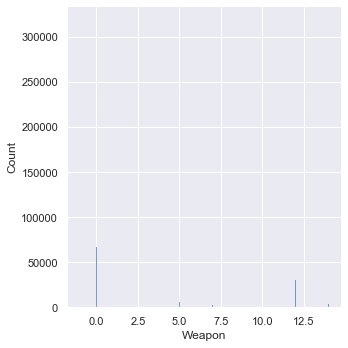

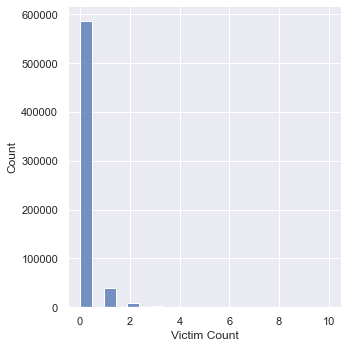

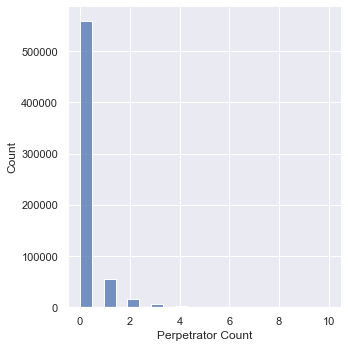

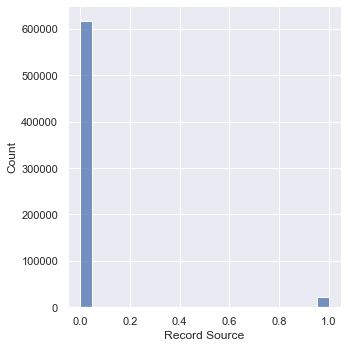

In [21]:
for col in data_fact.columns:
    if data[col].nunique() < 100:
        sns.displot(data_fact[col])
    else:
        sns.displot(data_fact[col], kind="kde")